In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [55]:
NoWGAN_dataset = pd.read_csv("combined_dataset1.csv")

In [56]:
NoWGAN_dataset.columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_slash', 'nb_semicolumn', 'nb_www', 'nb_com',
       'https_token', 'ratio_digits_url', 'ratio_digits_host',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'shortening_service', 'length_words_raw',
       'shortest_word_host', 'longest_words_raw', 'longest_word_host',
       'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints',
       'suspecious_tld', 'statistical_report', 'nb_hyperlinks',
       'ratio_intHyperlinks', 'ratio_extRedirection', 'external_favicon',
       'links_in_tags', 'ratio_intMedia', 'ratio_extMedia', 'safe_anchor',
       'empty_title', 'domain_in_title', 'domain_with_copyright',
       'domain_registration_length', 'domain_age', 'dns_record',
       'google_index', 'page_rank', 'status'],
      dtype='object')

In [57]:
X = NoWGAN_dataset.drop(columns=["status"])
y = NoWGAN_dataset["status"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Random Forest

In [59]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
y_predrfn = rf_model.predict(X_test)

In [61]:
print("Accuracy:", accuracy_score(y_test, y_predrfn))

Accuracy: 0.9497869750456482


In [62]:
print("Classification Report:\n", classification_report(y_test, y_predrfn))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1635
           1       0.95      0.95      0.95      1651

    accuracy                           0.95      3286
   macro avg       0.95      0.95      0.95      3286
weighted avg       0.95      0.95      0.95      3286



In [63]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predrfn))

Confusion Matrix:
 [[1552   83]
 [  82 1569]]


In [64]:
import joblib
# Save the model using joblib
joblib.dump(rf_model, 'model.joblib')


['model.joblib']

#                 .................................................With WGAN.........................

In [117]:
preprocessed_dataset = pd.read_csv("wgan_dataset.csv")

In [118]:
preprocessed_dataset.shape

(11430, 47)

In [119]:
X = preprocessed_dataset.drop(columns=["status"])
y = preprocessed_dataset["status"]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [122]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [123]:
rf_pred = rf_model.predict(X_test)

In [124]:
print("Accuracy:", accuracy_score(y_test, rf_pred))

Accuracy: 0.9597550306211724


In [125]:
print("Classification Report:\n", classification_report(y_test, rf_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1143
           1       0.96      0.96      0.96      1143

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



In [126]:
print("y_test shape:", y_test.shape)
print("rf_pred shape:", rf_pred.shape)

y_test shape: (2286,)
rf_pred shape: (2286,)


In [128]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1094   49]
 [  43 1100]]


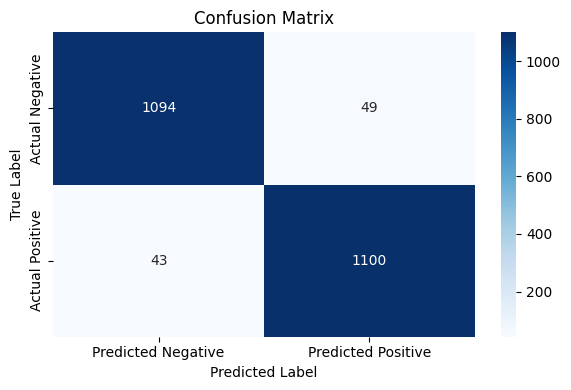

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_18500\3853414913.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


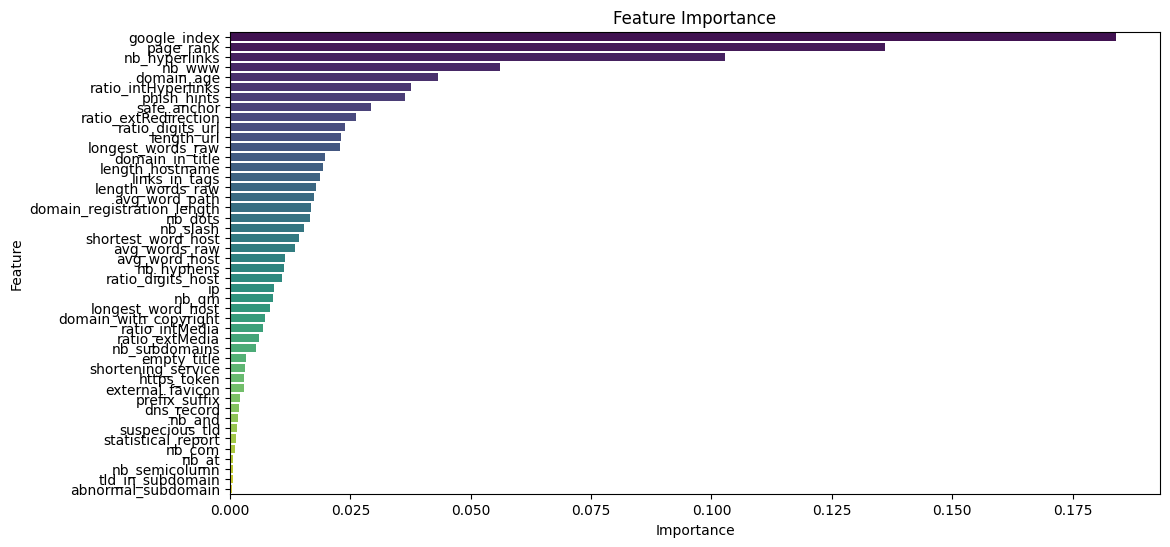

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
importances = rf_model.feature_importances_  # Assuming your model has been trained
feature_names = preprocessed_dataset.columns[:-1]  # Exclude target column
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [75]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get the predicted probabilities for the test data
y_prob = model.predict_proba(X_test)

# Define your custom threshold
threshold = 0.5  # This can be adjusted based on your needs

# Get the predicted class based on the threshold
y_pred = (y_prob[:, 1] >= threshold).astype(int)  # Use the second column for the "Suspicious" class

# Print the predictions
print(y_pred)

[1 1 1 ... 0 0 0]


In [76]:
import joblib
# Save the model using joblib
joblib.dump(rf_model, 'model_original.joblib')

['model_original.joblib']

## svm

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
svm_model = SVC(kernel="rbf", random_state=42)  # You can use other kernels like "linear" or "poly"
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [79]:
svm_pred = svm_model.predict(X_test_scaled)

In [80]:
print("Accuracy:", accuracy_score(y_test, svm_pred))

Accuracy: 0.952755905511811


In [81]:
print("Classification Report:\n", classification_report(y_test, svm_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1143
           1       0.95      0.95      0.95      1143

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286



## Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [83]:
dt_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, dt_pred))

Accuracy: 0.9343832020997376


In [84]:
print("Classification Report:\n", classification_report(y_test, dt_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      1143
           1       0.93      0.94      0.93      1143

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286



## Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
log_reg_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))

Logistic Regression Accuracy: 0.9238845144356955


In [87]:

print("Logistic Regression Classification Report:\n", classification_report(y_test, log_reg_pred))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1143
           1       0.92      0.92      0.92      1143

    accuracy                           0.92      2286
   macro avg       0.92      0.92      0.92      2286
weighted avg       0.92      0.92      0.92      2286



## Naive Bayes

In [88]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [89]:
nb_pred = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))

Naive Bayes Accuracy: 0.7646544181977253


In [90]:
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_pred))

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.96      0.80      1143
           1       0.94      0.57      0.71      1143

    accuracy                           0.76      2286
   macro avg       0.81      0.76      0.76      2286
weighted avg       0.81      0.76      0.76      2286



## XGBoost

In [91]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [92]:
xgb_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, xgb_pred))

Accuracy: 0.9676290463692039


In [93]:
print("Classification Report:\n", classification_report(y_test, xgb_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1143
           1       0.96      0.98      0.97      1143

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



In [94]:
# joblib.dump(model, 'model_original_XGBoost.joblib')

In [95]:
predictions = {
    "Random Forest": rf_pred,  # Replace with your Random Forest predictions
    "SVM": svm_pred,          # Replace with your SVM predictions
    "Decision Tree": dt_pred, # Replace with your Decision Tree predictions
    "Logistic Regression": log_reg_pred,
    "Naive Bayes": nb_pred,
    "XGBoost": xgb_pred       # Replace with your XGBoost predictions
}

# Initialize a dictionary to store results
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Calculate metrics for each model
for model_name, y_pred in predictions.items():
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report["weighted avg"]["precision"]
    recall = report["weighted avg"]["recall"]
    f1_score = report["weighted avg"]["f1-score"]
    
    # Append results
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1_score)

# Convert results to a pandas DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0        Random Forest  0.959755   0.959768  0.959755  0.959755
1                  SVM  0.952756   0.952761  0.952756  0.952756
2        Decision Tree  0.934383   0.934389  0.934383  0.934383
3  Logistic Regression  0.923885   0.923886  0.923885  0.923884
4          Naive Bayes  0.764654   0.812692  0.764654  0.755255
5              XGBoost  0.967629   0.967745  0.967629  0.967627


In [96]:
from tabulate import tabulate

# Generate a tabular representation of the results
table = tabulate(
    results_df,
    headers="keys",
    tablefmt="fancy_grid",  # Other options: "grid", "github", "pipe", etc.
    showindex=False
)

# Print the formatted table
print(table)

╒═════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│ Model               │   Accuracy │   Precision │   Recall │   F1-Score │
╞═════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ Random Forest       │   0.959755 │    0.959768 │ 0.959755 │   0.959755 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ SVM                 │   0.952756 │    0.952761 │ 0.952756 │   0.952756 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Decision Tree       │   0.934383 │    0.934389 │ 0.934383 │   0.934383 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Logistic Regression │   0.923885 │    0.923886 │ 0.923885 │   0.923884 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Naive Bayes         │   0.764654 │    0.812692 │ 0.764654 │   0.755255 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ XGBoost             │  

# ...........................................Without WGAN.........................................

In [97]:
X = NoWGAN_dataset.drop(columns=["status"])
y = NoWGAN_dataset["status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_model = SVC(kernel="rbf", random_state=42)  # You can use other kernels like "linear" or "poly"
svm_model.fit(X_train_scaled, y_train)
svm_prednw = svm_model.predict(X_test_scaled)

In [99]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
dt_prednw = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, dt_prednw))

Accuracy: 0.9175289105295191


In [100]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_prednw = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_prednw))

Logistic Regression Accuracy: 0.9214850882531954


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_prednw = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_prednw))

Naive Bayes Accuracy: 0.7641509433962265


In [102]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train, y_train)
xgb_prednw = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, xgb_prednw))

Accuracy: 0.9522215459525258


In [103]:
predictions = {
    "Random Forest": y_predrfn,  # Replace with your Random Forest predictions
    "SVM": svm_prednw,          # Replace with your SVM predictions
    "Decision Tree": dt_prednw, # Replace with your Decision Tree predictions
    "Logistic Regression": log_reg_prednw,
    "Naive Bayes": nb_prednw,
    "XGBoost": xgb_prednw       # Replace with your XGBoost predictions
}

# Initialize a dictionary to store results
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Calculate metrics for each model
for model_name, y_pred in predictions.items():
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report["weighted avg"]["precision"]
    recall = report["weighted avg"]["recall"]
    f1_score = report["weighted avg"]["f1-score"]
    
    # Append results
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1_score)

# Convert results to a pandas DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0        Random Forest  0.949787   0.949787  0.949787  0.949787
1                  SVM  0.940657   0.940702  0.940657  0.940654
2        Decision Tree  0.917529   0.917538  0.917529  0.917529
3  Logistic Regression  0.921485   0.921543  0.921485  0.921480
4          Naive Bayes  0.764151   0.800176  0.764151  0.757130
5              XGBoost  0.952222   0.952229  0.952222  0.952221


In [104]:
from tabulate import tabulate

# Generate a tabular representation of the results
table = tabulate(
    results_df,
    headers="keys",
    tablefmt="fancy_grid",  # Other options: "grid", "github", "pipe", etc.
    showindex=False
)

# Print the formatted table
print(table)

╒═════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│ Model               │   Accuracy │   Precision │   Recall │   F1-Score │
╞═════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ Random Forest       │   0.949787 │    0.949787 │ 0.949787 │   0.949787 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ SVM                 │   0.940657 │    0.940702 │ 0.940657 │   0.940654 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Decision Tree       │   0.917529 │    0.917538 │ 0.917529 │   0.917529 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Logistic Regression │   0.921485 │    0.921543 │ 0.921485 │   0.92148  │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Naive Bayes         │   0.764151 │    0.800176 │ 0.764151 │   0.75713  │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ XGBoost             │  

In [105]:
# !pip install tabulate